In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [4]:
# Load CFPB complaints dataset
DATA_PATH = "../data/raw/complaints.csv"
df = pd.read_csv(DATA_PATH)

print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())


C:\Users\Kifiya_Administrator\AppData\Local\Temp\ipykernel_3168\3508652710.py:3: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(DATA_PATH)


Dataset shape: (9609797, 18)
Columns: ['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue', 'Consumer complaint narrative', 'Company public response', 'Company', 'State', 'ZIP code', 'Tags', 'Consumer consent provided?', 'Submitted via', 'Date sent to company', 'Company response to consumer', 'Timely response?', 'Consumer disputed?', 'Complaint ID']


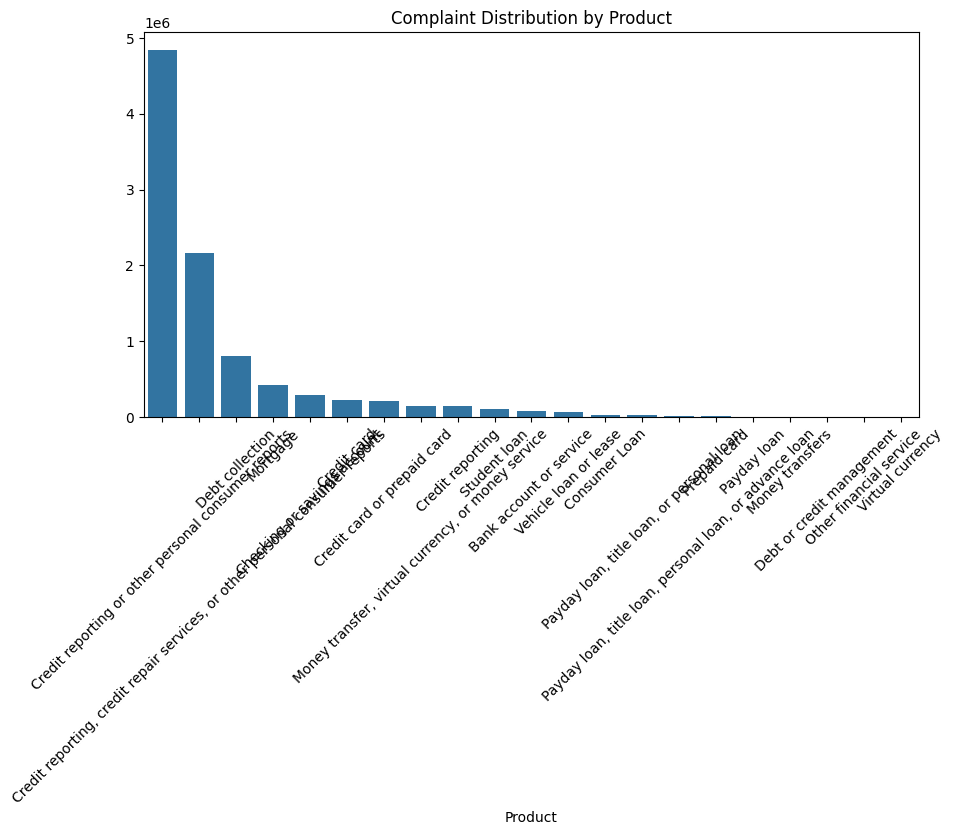

In [5]:
product_counts = df['Product'].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(x=product_counts.index, y=product_counts.values)
plt.xticks(rotation=45)
plt.title("Complaint Distribution by Product")
plt.show()


narrative_present
False    6629041
True     2980756
Name: count, dtype: int64


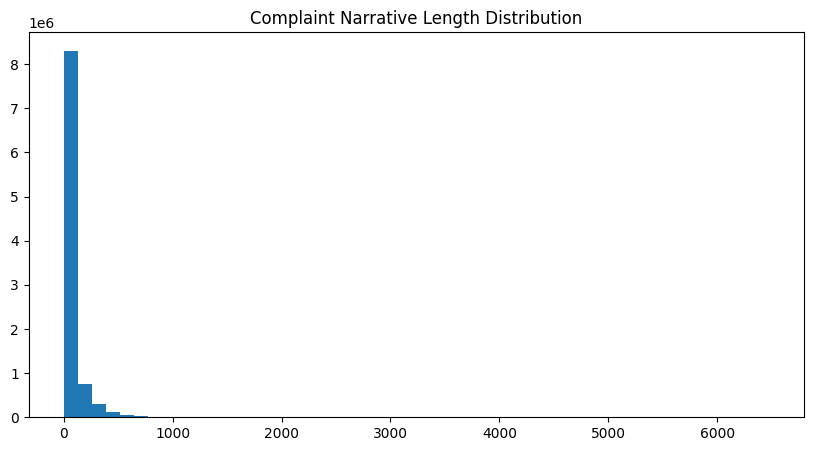

In [6]:
# Check which complaints have narratives
df['narrative_present'] = df['Consumer complaint narrative'].notna()
print(df['narrative_present'].value_counts())

# Narrative length (word count)
df['narrative_length'] = df['Consumer complaint narrative'].astype(str).apply(lambda x: len(x.split()))
plt.figure(figsize=(10,5))
plt.hist(df['narrative_length'], bins=50)
plt.title("Complaint Narrative Length Distribution")
plt.show()


In [7]:
products = [
    "Credit card",
    "Personal loan",
    "Savings account",
    "Money transfer"
]

df = df[df['Product'].isin(products)]
df = df[df['Consumer complaint narrative'].notna()]

print("Filtered dataset shape:", df.shape)


Filtered dataset shape: (80667, 20)


In [8]:
def clean_text(text):
    if text is None:
        return ""
    # Lowercase
    text = text.lower()
    # Remove special characters
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    # Collapse multiple spaces
    text = re.sub(r"\s+", " ", text)
    return text.strip()

df['cleaned_narrative'] = df['Consumer complaint narrative'].apply(clean_text)
df.head(3)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,...,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,narrative_present,narrative_length,cleaned_narrative
12237,2025-06-13,Credit card,Store credit card,Getting a credit card,Card opened without my consent or knowledge,A XXXX XXXX card was opened under my name by a...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",TX,78230,...,Consent provided,Web,2025-06-13,Closed with non-monetary relief,Yes,NaN,14069121,True,91,a xxxx xxxx card was opened under my name by a...
13280,2025-06-12,Credit card,General-purpose credit card or charge card,"Other features, terms, or problems",Other problem,"Dear CFPB, I have a secured credit card with c...",Company has responded to the consumer and the ...,"CITIBANK, N.A.",NY,11220,...,Consent provided,Web,2025-06-13,Closed with monetary relief,Yes,NaN,14047085,True,156,dear cfpb i have a secured credit card with ci...
13506,2025-06-12,Credit card,General-purpose credit card or charge card,Incorrect information on your report,Account information incorrect,I have a Citi rewards cards. The credit balanc...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",IL,60067,...,Consent provided,Web,2025-06-12,Closed with explanation,Yes,NaN,14040217,True,233,i have a citi rewards cards the credit balance...


In [9]:
OUTPUT_PATH = "../data/processed/filtered_complaints.csv"
df.to_csv(OUTPUT_PATH, index=False)
print(f"Filtered and cleaned dataset saved to {OUTPUT_PATH}")


Filtered and cleaned dataset saved to ../data/processed/filtered_complaints.csv
